In [1]:
#inspect_stock_data.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#23 January 2018
#
#this reads some NYSE data and makes some charts

In [2]:
#prep matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

In [3]:
#import numpy and pandas
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [4]:
#select date ranges, for plotting and for models
plot_date_range  = ('2016-02-01', '2016-10-01')
model_date_range = ('2017-01-12', '2018-01-12')

In [5]:
#read NYSE data
path = 'private/eoddata/NYSE_*.zip'
#path = 'private/eoddata/NYSE_2015.zip'
data_date_range  = ('2015-05-01', '2015-07-01')
drop_holidays = True
from helper_fns import *
#market = read_market_data(path, drop_holidays=drop_holidays, start_date=data_date_range[0], end_date=data_date_range[1])
market = read_market_data(path, drop_holidays=drop_holidays)
print 'number of records (M) = ', len(market)/1.0e5
print 'number of tickers = ', len(market.ticker.unique())
print 'number of dates = ', len(market.date.unique())
print market.dtypes
market.head(6)

reading file =  private/eoddata/NYSE_2013.zip
reading file =  private/eoddata/NYSE_2014.zip
reading file =  private/eoddata/NYSE_2015.zip
reading file =  private/eoddata/NYSE_2016.zip
reading file =  private/eoddata/NYSE_2017.zip
reading file =  private/eoddata/NYSE_2018.zip
number of records (M) =  33.24493
number of tickers =  3177
number of dates =  1264
ticker            object
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
vol                int64
dtype: object


,ticker,date,open,high,low,close,vol
0,A,2013-01-02,30.1645,30.1645,29.4349,29.9571,6290000
1,AA,2013-01-02,26.6400,26.9700,26.5200,26.9700,21047600
2,AAN,2013-01-02,28.7200,28.7800,28.3000,28.7000,463500
3,AAP,2013-01-02,73.7400,73.7600,71.6900,72.4900,800400
4,AAT,2013-01-02,28.4900,28.7900,28.2500,28.5300,240900
5,AAV,2013-01-02,3.2800,3.3000,3.1800,3.2000,185500


In [6]:
#compute cumulative-sum of daily dollar-volume
N_days = (market.date.max() - market.date.min()).days
market['dollar_rate'] = market['open']*market['vol']/N_days
G_dpd_cs = market.groupby('ticker')['dollar_rate'].sum().sort_values(ascending=False).cumsum()/1.0e9
G_dpd_cs.head(5)

ticker
BAC     1.101142
BABA    1.913515
C       2.661735
JPM     3.407627
GE      4.151747
Name: dollar_rate, dtype: float64

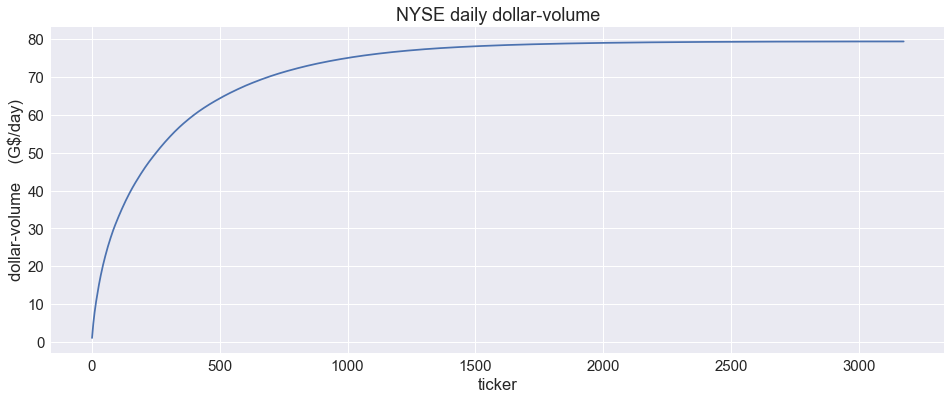

In [7]:
#plot giga_dpd_cs versus ticker
yp = G_dpd_cs
xp = range(len(yp))
fig, ax = plt.subplots(figsize=(16, 6))
p = ax.plot(xp, yp, linestyle='-')
p = ax.set_title('NYSE daily dollar-volume')
p = ax.set_xlabel('ticker')
p = ax.set_ylabel('dollar-volume    (G$/day)')
#plt.savefig('figs/volume.png')

In [8]:
#get top 500 tickers by traded dollar value
N_tickers = 50#0
tickers = G_dpd_cs.index[0:N_tickers].values.tolist()
print tickers

['BAC', 'BABA', 'C', 'JPM', 'GE', 'XOM', 'WFC', 'T', 'PFE', 'JNJ', 'VZ', 'CVX', 'PG', 'IBM', 'DIS', 'ORCL', 'MRK', 'HD', 'WMT', 'GS', 'AGN', 'AA', 'BA', 'SLB', 'KO', 'SGY', 'MCD', 'TWTR', 'CIE', 'HTZ', 'GM', 'BRK.B', 'HAL', 'F', 'CAT', 'ABBV', 'V', 'AIG', 'CVS', 'VRX', 'UNH', 'BMY', 'PM', 'DAL', 'COP', 'UTX', 'TWX', 'MS', 'MDT', 'FCX']


In [31]:
#resample across 1-week time-bins, pivot data, and lag 'close' column by 1 week
#this drops companies that started midway...needs to be fixed...
freq = 'w'
market_resampled, dfr = resample_data(market, freq, tickers=tickers)
print 'market_resampled.shape = ', market_resampled.shape
print 'market_resampled.columns = ', market_resampled.columns
market_resampled.head()

market_resampled.shape =  (260, 184)
market_resampled.columns =  Index([u'close_AA', u'close_ABBV', u'close_AIG', u'close_BA', u'close_BAC',
       u'close_BMY', u'close_BRK.B', u'close_C', u'close_CAT', u'close_COP',
       ...
       u'delta_T', u'delta_TWX', u'delta_UNH', u'delta_UTX', u'delta_V',
       u'delta_VRX', u'delta_VZ', u'delta_WFC', u'delta_WMT', u'delta_XOM'],
      dtype='object', length=184)


,close_AA,close_ABBV,close_AIG,close_BA,close_BAC,close_BMY,close_BRK.B,close_C,close_CAT,close_COP,close_CVS,close_CVX,close_DAL,close_DIS,close_F,close_FCX,close_GE,close_GM,close_GS,close_HAL,close_HD,close_HTZ,close_IBM,close_JNJ,close_JPM,close_KO,close_MCD,close_MDT,close_MRK,close_MS,close_ORCL,close_PFE,close_PG,close_PM,close_SGY,close_SLB,close_T,close_TWX,close_UNH,close_UTX,close_V,close_VRX,close_VZ,close_WFC,close_WMT,close_XOM,G$vol_AA,G$vol_ABBV,G$vol_AIG,G$vol_BA,G$vol_BAC,G$vol_BMY,G$vol_BRK.B,G$vol_C,G$vol_CAT,G$vol_COP,G$vol_CVS,G$vol_CVX,G$vol_DAL,G$vol_DIS,G$vol_F,G$vol_FCX,G$vol_GE,G$vol_GM,G$vol_GS,G$vol_HAL,G$vol_HD,G$vol_HTZ,G$vol_IBM,G$vol_JNJ,G$vol_JPM,G$vol_KO,G$vol_MCD,G$vol_MDT,G$vol_MRK,G$vol_MS,G$vol_ORCL,G$vol_PFE,G$vol_PG,G$vol_PM,G$vol_SGY,G$vol_SLB,G$vol_T,G$vol_TWX,G$vol_UNH,G$vol_UTX,G$vol_V,G$vol_VRX,G$vol_VZ,G$vol_WFC,G$vol_WMT,G$vol_XOM,std_AA,std_ABBV,std_AIG,std_BA,std_BAC,std_BMY,std_BRK.B,std_C,std_CAT,std_COP,std_CVS,std_CVX,std_DAL,std_DIS,std_F,std_FCX,std_GE,std_GM,std_GS,std_HAL,std_HD,std_HTZ,std_IBM,std_JNJ,std_JPM,std_KO,std_MCD,std_MDT,std_MRK,std_MS,std_ORCL,std_PFE,std_PG,std_PM,std_SGY,std_SLB,std_T,std_TWX,std_UNH,std_UTX,std_V,std_VRX,std_VZ,std_WFC,std_WMT,std_XOM,delta_AA,delta_ABBV,delta_AIG,delta_BA,delta_BAC,delta_BMY,delta_BRK.B,delta_C,delta_CAT,delta_COP,delta_CVS,delta_CVX,delta_DAL,delta_DIS,delta_F,delta_FCX,delta_GE,delta_GM,delta_GS,delta_HAL,delta_HD,delta_HTZ,delta_IBM,delta_JNJ,delta_JPM,delta_KO,delta_MCD,delta_MDT,delta_MRK,delta_MS,delta_ORCL,delta_PFE,delta_PG,delta_PM,delta_SGY,delta_SLB,delta_T,delta_TWX,delta_UNH,delta_UTX,delta_V,delta_VRX,delta_VZ,delta_WFC,delta_WMT,delta_XOM
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-07,27.78,34.39,36.30,77.69,12.11,33.35,93.85,42.43,94.92,59.83,49.99,110.50,12.98,52.19,13.57,35.49,21.20,29.86,134.51,36.65,63.18,69.36,193.99,71.55,45.36,37.66,89.85,42.66,41.97,20.19,34.61,25.96,69.09,86.52,906.8,72.01,35.23,49.37,52.09,84.98,39.1925,60.71,44.30,34.94,69.06,88.96,1.661721,1.806566,1.960992,0.959447,6.318712,1.023313,1.744483,5.379975,2.485077,0.915848,1.018958,1.914362,0.540998,1.428714,3.340354,1.661370,2.666945,1.364328,1.873833,1.253438,1.265192,1.274878,2.191434,2.421638,3.585969,1.998330,1.640969,0.674798,2.309452,1.811918,2.653247,2.472008,1.627272,1.418217,2.082292,1.253249,3.075983,0.982046,1.610579,1.017069,0.398711,0.493453,1.889218,3.041939,1.776803,3.603839,0.013149,0.005737,0.003401,0.008212,0.003320,0.009727,0.013911,0.010646,0.008670,0.001418,0.008574,0.001337,0.021957,0.005727,0.012007,0.006797,0.008161,0.011734,0.002941,0.013479,0.004535,0.012276,0.004559,0.001292,0.005900,0.009149,0.007093,0.013752,0.008077,0.017756,0.008228,0.009292,0.005761,0.013280,0.020396,0.003521,0.011837,0.012039,0.024440,0.006385,0.005374,0.006954,0.005238,0.007108,0.004591,0.004771,-0.034557,-0.008785,-0.023829,-0.030694,-0.042798,0.025849,0.005432,-0.004701,0.006556,-0.024117,0.033649,0.014897,0.013667,-0.022798,0.035503,-0.008779,-0.001418,0.024291,0.022595,0.006044,0.018385,0.019175,0.005429,0.011888,0.022153,-0.016258,0.021834,0.036453,0.029286,0.009005,0.010728,0.023543,0.004353,0.035511,-0.045515,0.031036,-0.027801,0.010799,0.018119,0.007570,0.026955,0.048616,-0.021469,0.004579,-0.002906,0.014721
2013-01-14,26.82,33.85,35.23,75.16,11.63,34.13,94.39,42.34,95.19,58.27,51.30,111.73,13.35,50.58,14.00,35.00,21.13,30.36,137.13,36.62,63.70,70.16,194.45,72.35,46.14,36.91,91.73,44.07,43.23,20.17,34.86,26.52,69.22,89.23,855.6,73.75,34.27,49.61,52.82,85.18,40.2900,63.63,43.30,35.10,68.63,89.61,4.037331,2.753654,3.060773,4.028741,12.505594,1.425160,1.889241,8.251036,2.216164,1.483445,1.503237,2.916675,1.227693,2.132435,3.820180,2.730854,3.726160,1.528330,2.581587,1.692627,1.697719,2.401238,3.205961,3.205045,5.157513,2.629585,2.270361,0.942984,2.606179,2.608643,2.875004,4

In [32]:
#get x features
substrings = ['close', 'G$vol', 'std']
cols = []
for col in market_resampled.columns:
    for s in substrings:
        if (s in col):
            cols += [col]
x = market_resampled[cols]
x_np = x.values
print 'x.shape = ', x.shape
print 'x_np.shape = ', x_np.shape
x.head()

x.shape =  (260, 138)
x_np.shape =  (260, 138)


,close_AA,close_ABBV,close_AIG,close_BA,close_BAC,close_BMY,close_BRK.B,close_C,close_CAT,close_COP,close_CVS,close_CVX,close_DAL,close_DIS,close_F,close_FCX,close_GE,close_GM,close_GS,close_HAL,close_HD,close_HTZ,close_IBM,close_JNJ,close_JPM,close_KO,close_MCD,close_MDT,close_MRK,close_MS,close_ORCL,close_PFE,close_PG,close_PM,close_SGY,close_SLB,close_T,close_TWX,close_UNH,close_UTX,close_V,close_VRX,close_VZ,close_WFC,close_WMT,close_XOM,G$vol_AA,G$vol_ABBV,G$vol_AIG,G$vol_BA,G$vol_BAC,G$vol_BMY,G$vol_BRK.B,G$vol_C,G$vol_CAT,G$vol_COP,G$vol_CVS,G$vol_CVX,G$vol_DAL,G$vol_DIS,G$vol_F,G$vol_FCX,G$vol_GE,G$vol_GM,G$vol_GS,G$vol_HAL,G$vol_HD,G$vol_HTZ,G$vol_IBM,G$vol_JNJ,G$vol_JPM,G$vol_KO,G$vol_MCD,G$vol_MDT,G$vol_MRK,G$vol_MS,G$vol_ORCL,G$vol_PFE,G$vol_PG,G$vol_PM,G$vol_SGY,G$vol_SLB,G$vol_T,G$vol_TWX,G$vol_UNH,G$vol_UTX,G$vol_V,G$vol_VRX,G$vol_VZ,G$vol_WFC,G$vol_WMT,G$vol_XOM,std_AA,std_ABBV,std_AIG,std_BA,std_BAC,std_BMY,std_BRK.B,std_C,std_CAT,std_COP,std_CVS,std_CVX,std_DAL,std_DIS,std_F,std_FCX,std_GE,std_GM,std_GS,std_HAL,std_HD,std_HTZ,std_IBM,std_JNJ,std_JPM,std_KO,std_MCD,std_MDT,std_MRK,std_MS,std_ORCL,std_PFE,std_PG,std_PM,std_SGY,std_SLB,std_T,std_TWX,std_UNH,std_UTX,std_V,std_VRX,std_VZ,std_WFC,std_WMT,std_XOM
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-07,27.78,34.39,36.30,77.69,12.11,33.35,93.85,42.43,94.92,59.83,49.99,110.50,12.98,52.19,13.57,35.49,21.20,29.86,134.51,36.65,63.18,69.36,193.99,71.55,45.36,37.66,89.85,42.66,41.97,20.19,34.61,25.96,69.09,86.52,906.8,72.01,35.23,49.37,52.09,84.98,39.1925,60.71,44.30,34.94,69.06,88.96,1.661721,1.806566,1.960992,0.959447,6.318712,1.023313,1.744483,5.379975,2.485077,0.915848,1.018958,1.914362,0.540998,1.428714,3.340354,1.661370,2.666945,1.364328,1.873833,1.253438,1.265192,1.274878,2.191434,2.421638,3.585969,1.998330,1.640969,0.674798,2.309452,1.811918,2.653247,2.472008,1.627272,1.418217,2.082292,1.253249,3.075983,0.982046,1.610579,1.017069,0.398711,0.493453,1.889218,3.041939,1.776803,3.603839,0.013149,0.005737,0.003401,0.008212,0.003320,0.009727,0.013911,0.010646,0.008670,0.001418,0.008574,0.001337,0.021957,0.005727,0.012007,0.006797,0.008161,0.011734,0.002941,0.013479,0.004535,0.012276,0.004559,0.001292,0.005900,0.009149,0.007093,0.013752,0.008077,0.017756,0.008228,0.009292,0.005761,0.013280,0.020396,0.003521,0.011837,0.012039,0.024440,0.006385,0.005374,0.006954,0.005238,0.007108,0.004591,0.004771
2013-01-14,26.82,33.85,35.23,75.16,11.63,34.13,94.39,42.34,95.19,58.27,51.30,111.73,13.35,50.58,14.00,35.00,21.13,30.36,137.13,36.62,63.70,70.16,194.45,72.35,46.14,36.91,91.73,44.07,43.23,20.17,34.86,26.52,69.22,89.23,855.6,73.75,34.27,49.61,52.82,85.18,40.2900,63.63,43.30,35.10,68.63,89.61,4.037331,2.753654,3.060773,4.028741,12.505594,1.425160,1.889241,8.251036,2.216164,1.483445,1.503237,2.916675,1.227693,2.132435,3.820180,2.730854,3.726160,1.528330,2.581587,1.692627,1.697719,2.401238,3.205961,3.205045,5.157513,2.629585,2.270361,0.942984,2.606179,2.608643,2.875004,4.021018,2.995953,2.317697,2.422755,1.717078,4.406064,1.316237,1.981501,1.563980,0.654703,0.423785,3.431704,5.395405,2.387630,5.453501,0.013414,0.011843,0.003588,0.014522,0.019404,0.009076,0.005237,0.004898,0.003803,0.009164,0.010273,0.005992,0.014347,0.007684,0.019775,0.006240,0.003931,0.013089,0.010924,0.006935,0.007164,0.007886,0.002231,0.004677,0.007625,0.006462,0.008786,0.011109,0.009248,0.009160,0.007937,0.013406,0.004166,0.014257,0.015640,0.009512,0.010733,0.009877,0.012301,0.004958,0.014284,0.025605,0.013106,0.003768,0.002981,0.004999
2013-01-22,27.00,37.32,35.09,75.04,11.14,34.46,95.16,41.66,97.62,59.27,52.11,115.24,13.61,52.34,14.11,33.64,22.04,29.28,144.45,37.50,65.47,71.36,194.47,73.23,46.46,37.70,92.26,45.67,42.98,22.38,35.11,26.54,69.94,89.98,889.6,76.50,33.44,49.93,54.56,86.95,39.5675,63.77,42.54,34.93,69.20,90.80,2.281616,2.570303,3.019273,4.515765,10.427859,1.169432,2.181952,8.906063,2.43130

In [33]:
#get target variables y
substrings = ['delta']
cols = []
for col in market_resampled.columns:
    for s in substrings:
        if (s in col):
            cols += [col]
y = market_resampled[cols]
y_np = y.values
print 'y.shape = ', y.shape
print 'y_np.shape = ', y_np.shape
y.head()

y.shape =  (260, 46)
y_np.shape =  (260, 46)


,delta_AA,delta_ABBV,delta_AIG,delta_BA,delta_BAC,delta_BMY,delta_BRK.B,delta_C,delta_CAT,delta_COP,delta_CVS,delta_CVX,delta_DAL,delta_DIS,delta_F,delta_FCX,delta_GE,delta_GM,delta_GS,delta_HAL,delta_HD,delta_HTZ,delta_IBM,delta_JNJ,delta_JPM,delta_KO,delta_MCD,delta_MDT,delta_MRK,delta_MS,delta_ORCL,delta_PFE,delta_PG,delta_PM,delta_SGY,delta_SLB,delta_T,delta_TWX,delta_UNH,delta_UTX,delta_V,delta_VRX,delta_VZ,delta_WFC,delta_WMT,delta_XOM
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-07,-0.034557,-0.008785,-0.023829,-0.030694,-0.042798,0.025849,0.005432,-0.004701,0.006556,-0.024117,0.033649,0.014897,0.013667,-0.022798,0.035503,-0.008779,-0.001418,0.024291,0.022595,0.006044,0.018385,0.019175,0.005429,0.011888,0.022153,-0.016258,0.021834,0.036453,0.029286,0.009005,0.010728,0.023543,0.004353,0.035511,-0.045515,0.031036,-0.027801,0.010799,0.018119,0.007570,0.026955,0.048616,-0.021469,0.004579,-0.002906,0.014721
2013-01-14,0.002227,0.097324,-0.003125,-0.002526,-0.040482,0.009669,0.006452,-0.016525,0.022734,0.016987,0.013616,0.031323,0.023308,0.038492,0.004986,-0.038857,0.040604,-0.033344,0.052919,0.024590,0.028432,0.016524,0.008557,0.008678,0.012421,0.019194,0.005449,0.038190,-0.007619,0.105731,0.007461,-0.002631,0.010256,0.007164,0.036347,0.042376,-0.021077,0.005639,0.031965,0.019941,-0.018663,0.001413,-0.008854,-0.001715,0.010366,0.013506
2013-01-22,0.000000,0.016766,0.044097,0.012277,0.044964,0.067501,0.023434,0.037727,-0.008403,0.029680,0.002707,0.009469,0.038856,0.037984,-0.027027,0.024684,0.004959,-0.004111,0.003125,0.058071,0.037162,0.018550,0.054589,0.013714,0.019676,-0.018283,0.017037,0.019324,0.016133,0.028080,0.012303,0.016184,0.048676,-0.005671,0.014363,0.038396,0.015826,0.011845,0.025435,0.036477,0.007691,0.027391,-0.007674,0.009770,-0.000724,0.016174
2013-01-28,-0.007718,-0.013531,0.047722,0.013126,0.006014,0.020177,0.005954,0.000931,0.013859,-0.032884,0.007225,-0.000515,-0.024011,0.005896,-0.034841,0.022903,0.008021,-0.030293,0.037873,0.023163,-0.012472,0.033739,0.001269,0.002975,0.021563,0.012952,0.021397,0.009901,-0.033726,0.031593,0.022592,0.019557,0.029703,-0.013212,-0.004403,-0.000376,0.044105,0.006130,-0.011521,-0.001112,-0.010731,0.025152,0.041852,-0.001989,0.020411,-0.017781
2013-02-04,0.002242,-0.010644,0.006226,0.030556,0.015544,0.014799,-0.005217,0.007316,-0.020233,-0.010262,-0.004278,0.005390,0.071848,0.009232,0.012365,0.004510,0.004016,0.024381,0.022597,0.013759,0.002243,-0.007535,-0.012292,0.024430,0.022928,0.034418,-0.005556,0.011598,-0.005074,0.021016,-0.025412,-0.017903,0.000793,0.033360,0.016607,-0.000506,-0.003109,0.042228,0.043745,-0.003760,0.000190,0.014666,0.002033,-0.001431,0.029378,-0.008948


In [34]:
#test-train-validation split is 1:1:1
train_fraction = 0.333
rn_seed = 14
from sklearn.model_selection import train_test_split
x_train, x_test_validate, y_train, y_test_validate = train_test_split(x_np, y_np, train_size=train_fraction, 
    test_size=(1-train_fraction), random_state=rn_seed)
train_fraction = 0.5
x_test, x_validate, y_test, y_validate = train_test_split(x_test_validate, y_test_validate, train_size=train_fraction,
    test_size=(1-train_fraction), random_state=rn_seed)
print x.shape, y.shape
print x_train.shape, y_train.shape
print x_test.shape, y_test.shape
print x_validate.shape, y_validate.shape

(260, 138) (260, 46)
(86, 138) (86, 46)
(87, 138) (87, 46)
(87, 138) (87, 46)


In [120]:
#build MLP classification model 
N_inputs = x.shape[1]
N_outputs = y.shape[1]
N_middle = (N_inputs + N_outputs)/2
layers = [N_inputs, N_middle, N_outputs]
dropout_fraction = 5.0e-4
print 'layers = ', layers
print 'dropout_fraction = ', dropout_fraction
model = mlp_classifier(layers, dropout_fraction=dropout_fraction)
model.summary()

layers =  [138, 92, 46]
dropout_fraction =  0.0005
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 138)               19182     
_________________________________________________________________
dropout_85 (Dropout)         (None, 138)               0         
_________________________________________________________________
dense_158 (Dense)            (None, 92)                12788     
_________________________________________________________________
dropout_86 (Dropout)         (None, 92)                0         
_________________________________________________________________
dense_159 (Dense)            (None, 46)                4278      
Total params: 36,248
Trainable params: 36,248
Non-trainable params: 0
_________________________________________________________________


In [121]:
#fit model
N_epochs = 151
batch_size = 10
model = mlp_classifier(layers, dropout_fraction=dropout_fraction)
fit_history = model.fit(x_train, y_train, batch_size=batch_size, epochs=N_epochs, verbose=0, 
    validation_data=(x_validate, y_validate))

[0.001702665542680556, 0.0017016579399698939, 0.0017004943996046979, 0.0016996912262134854, 0.0016985974346833497]


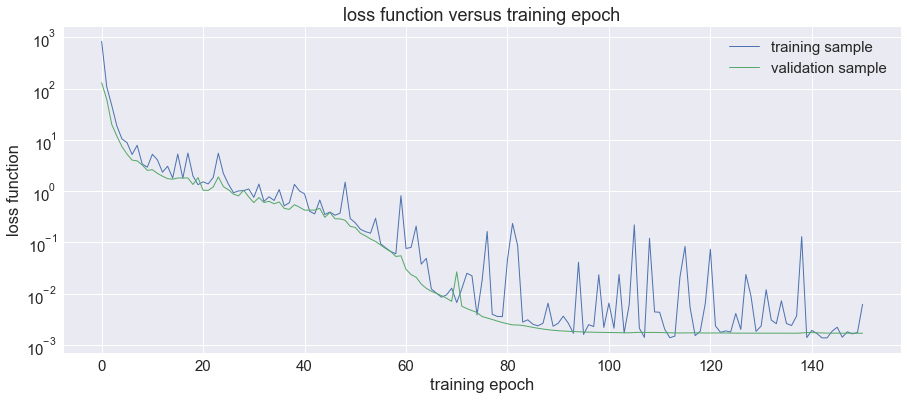

In [122]:
#plot loss vs training epoch
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = fit_history.epoch
yp = fit_history.history['loss']
p = ax.plot(xp, yp, linewidth=1, label='training sample')
yp = fit_history.history['val_loss']
p = ax.plot(xp, yp, linewidth=1, label='validation sample')
p = ax.set_title('loss function versus training epoch')
p = ax.set_ylabel('loss function')
p = ax.set_xlabel('training epoch')
p = ax.set_yscale('log')
#p = ax.set_xlim(-1, 100)
#p = ax.set_ylim(-0.01, 0.2)
p = ax.legend()
#plt.savefig('figs/loss.png')
print yp[-5:]

In [123]:
y_test_pred = model.predict(x_test)

In [126]:
y_test[0]

array([ 0.01507538,  0.02301732,  0.02770885,  0.04456746,  0.0055517 ,
        0.03837902,  0.01257469,  0.0202061 ,  0.03534031,  0.01377289,
        0.02079073,  0.02417292,  0.07769784,  0.08262987,  0.01402688,
        0.05323558,  0.02191663, -0.00770501,  0.04186519,  0.00913891,
        0.02918608,  0.0649505 ,  0.04622169,  0.01350269, -0.00359985,
        0.00598024,  0.01174392,  0.00186986,  0.0039916 ,  0.04339763,
        0.00464253,  0.00956091,  0.02171384,  0.03992418,  0.05749129,
        0.01807936,  0.02539588,  0.01839492,  0.00499258,  0.0468418 ,
        0.06611011, -0.01214897,  0.03042071,  0.0161368 ,  0.02072752,
        0.01213648])

In [128]:
y_test_pred[0]

array([ 0.00744411,  0.00739152,  0.00465956,  0.00600514,  0.0044027 ,
       -0.00262615,  0.0007781 ,  0.00552931,  0.00024334,  0.00299438,
        0.0019344 ,  0.00409423,  0.00386332,  0.0034542 ,  0.00150963,
       -0.00439862, -0.00201918,  0.00106919,  0.00419703,  0.0055986 ,
        0.00837908,  0.00838677, -0.00326724,  0.00071468,  0.00982655,
        0.00388623,  0.00311402,  0.00471618,  0.00423644,  0.00816001,
        0.00433337,  0.0030078 ,  0.00128949,  0.00140503, -0.00775038,
        0.00690183,  0.00110729,  0.00246797,  0.00916032,  0.00184936,
        0.00486236, -0.00369562,  0.00086931,  0.00355613,  0.00395849,
        0.003511  ], dtype=float32)

In [ ]:
ticker = 'GE'
df = market
idx = (df['ticker'] == ticker)
df = df[idx].set_index('date')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
yp = df['open']
ax.plot(yp, marker='o', markersize=3, linestyle='-', label='open')
yp = df['close']
ax.plot(yp, marker='o', markersize=3, linestyle='-', label='close')
df = market_resampled
idx = (df['ticker'] == ticker)
df = df[idx].set_index('date')
yp = df['open']
xp = yp.index
err = df['std']
ax.errorbar(xp, yp, yerr=err, marker='o', markersize=9, linestyle='-.', alpha=0.6, label='weekly avg')
df = df.set_index('date_lagged')
yp = df['open']
xp = yp.index
ax.plot(yp, marker='o', markersize=9, linestyle='-.', label='open/lagged')
ax.set_title('ticker = ' + ticker)
ax.set_ylabel('share price')
ax.set_xlabel('date')
ax.set_xlim(plot_date_range)
ax.legend()
#plt.savefig('figs/field_parameters.png')

In [ ]:
market_resampled.head()

In [ ]:
#compute volume of shares traded each day
daily_volume = market.groupby('date')['vol'].sum()
daily_volume.head(10)

In [ ]:
#plot daily volume vs date
fig, ax = plt.subplots(figsize=(16, 6))
xp = daily_volume.index
yp = daily_volume.values/1.0e9
p = ax.plot(xp, yp, linestyle='-')
ax.set_title('NYSE daily share volume')
ax.set_xlabel('date')
ax.set_ylabel('shares traded    (G)')
ax.set_ylim(0, 8)
ax.set_xlim(plot_date_range)
plt.savefig('figs/volume.png')

In [ ]:
#compute volume-weighted share price versus date
def volume_weighted_share_price(record):
    vwsp = None
    cv = record['close']*record['vol']
    v_total = record['vol'].sum()
    if (v_total > 0.0):
        vwsp = cv.sum()/v_total
    return vwsp
vwsp = market.groupby('date').apply(volume_weighted_share_price)

In [ ]:
#plot volume-weighted share price vs date
fig, ax = plt.subplots(figsize=(16, 6))
xp = vwsp.index
yp = vwsp.values
p = ax.plot(xp, yp, linestyle='-')
ax.set_title('NYSE volume-weighted mean share price')
ax.set_xlabel('date')
ax.set_ylabel('volume-weighted share price')
ax.set_ylim(31, 45)
ax.set_xlim(plot_date_range)
plt.savefig('figs/vwsp.png')

In [ ]:
#plot fractional volume-weighted gain vs date
fig, ax = plt.subplots(figsize=(16, 6))
xp = vwsp.index
yp = vwsp.values
yp = (yp - yp[0])/yp[0]
p = ax.plot(xp, yp, linestyle='-')
p = ax.set_title('fractional change in NYSE volume-weighted mean share price')
p = ax.set_xlabel('date')
p = ax.set_ylabel('fractional gain')
p = ax.set_xlim(plot_date_range)
plt.savefig('figs/fractional_vwsp.png')

In [ ]:
#simulate mean outcome for 25 people, each trading $10K worth of randomly selected tickers daily
N_buyers = 25
N_tickers = 5
initial_dollars = 10000.0
idx = (market['date'] >= model_date_range[0]) & (market['date'] <= model_date_range[1])
market_data = market[idx]
ran_purchases = random_purchases(market_data, N_buyers, N_tickers, initial_dollars)

In [ ]:
#plot mean fractional gain exhibited by random purchasers
fig, ax = plt.subplots(figsize=(16, 6))
xp = ran_purchases.index.values
yp = ran_purchases['dollars_mean'].values
err = ran_purchases['dollars_std'].values/yp[0]
yp = (yp -yp[0])/yp[0]
p = ax.plot(xp, yp, linestyle='-')
p = ax.errorbar(xp, yp, err, linestyle='none', alpha=0.5)
ax.set_title('simulated outcome for daily random purchases')
ax.set_xlabel('date')
ax.set_ylabel('fractional gain')
ax.set_xlim(model_date_range)
plt.savefig('figs/random_purchases.png')